<h3 align=center> In His Name, the Most High </h3>

In [ ]:
#importing libraries
import re
import matplotlib.pyplot as plt
plt.style.use('seaborn') # beautiful plots :O

## ATIS Dataset EDA

The ATIS dataset is a standard benchmark dataset widely used for intent classification and slot filling.
here we obtained the dataset from https://github.com/yvchen/JointSLU.

In [ ]:
#importing train data

train_words = list() # a list of list of words for every sentence in train dataset
train_tags = list() # a list of list of IOB tags for every sentence in train dataset
train_intents = list() # a list of intent for every sentence in train dataset
train_data = list() # a list of dicts contaiting above data in a more structured form
train_vocabs = set() # a set containing whole train dataset words

with open('atis-2.train+dev.w-intent.iob') as f:
    for line in f.readlines():
        line = line.strip().split()
        
        index = 0
        words = list()
        for i, word in enumerate(line[:-1]):
            if (word == 'EOS'):
                index = i
                break
            if (word != 'BOS'): 
                # what to do if not word.isalpha()??
                # word = re.sub(r'[^\w\s]', '', word) # removing punctuations
                word = word.lower() # lowerizing word
                words.append(word) 
                train_vocabs.add(word)
        
        tags = list()
        for tag in line[index + 2:-1]:
            tags.append(tag)
                    
        # handling entries with multiple intents
        intent = ""
        if ('#' in line[-1]): 
            for item in line[-1].split('#'):
                intent = item
                break
        else: intent = line[-1]

        if (intent != 'atis_cheapest'): #droping 'atis_cheapest' because it has only 1 sample!
          train_words.append(words)
          train_tags.append(tags)
          train_intents.append(intent)
          train_data.append({
              'words': words,
              'iob_tags': tags,
              #             'length': len(words),
              'intent': intent})

print('train dataset vocab size:', len(train_vocabs))
print('# of train dataset rows:', len(train_data))
print('# of train dataset unique intents:', len(set(train_intents)))
print('# of train dataset unique IOB tags:', len(set([tag for item in train_tags for tag in item])))

train dataset vocab size: 898
# of train dataset rows: 4977
# of train dataset unique intents: 16
# of train dataset unique IOB tags: 121


In [ ]:
ind = 0
train_data[ind]

{'intent': 'atis_flight',
 'iob_tags': ['O',
  'O',
  'O',
  'O',
  'O',
  'B-fromloc.city_name',
  'O',
  'B-toloc.city_name',
  'B-round_trip',
  'I-round_trip'],
 'words': ['i',
  'want',
  'to',
  'fly',
  'from',
  'baltimore',
  'to',
  'dallas',
  'round',
  'trip']}

In [ ]:
print('tokenized words:', train_data[ind]['words'])
print('IOB tags:', train_data[ind]['iob_tags'])
print('intent:', train_data[ind]['intent'])

tokenized words: ['i', 'want', 'to', 'fly', 'from', 'baltimore', 'to', 'dallas', 'round', 'trip']
IOB tags: ['O', 'O', 'O', 'O', 'O', 'B-fromloc.city_name', 'O', 'B-toloc.city_name', 'B-round_trip', 'I-round_trip']
intent: atis_flight


In [ ]:
train_intents_freq = dict()
for intent in set(train_intents):
    train_intents_freq[intent] = train_intents.count(intent)
    
for key in train_intents_freq:
    value = train_intents_freq[key]
    print('%s: %d (%.2f%%),' % (key, value, value / len(train_intents) * 100))

atis_flight_no: 12 (0.24%),
atis_restriction: 6 (0.12%),
atis_aircraft: 82 (1.65%),
atis_airline: 159 (3.19%),
atis_meal: 6 (0.12%),
atis_quantity: 51 (1.02%),
atis_airfare: 424 (8.52%),
atis_city: 19 (0.38%),
atis_abbreviation: 147 (2.95%),
atis_capacity: 16 (0.32%),
atis_flight_time: 54 (1.08%),
atis_airport: 20 (0.40%),
atis_flight: 3687 (74.08%),
atis_distance: 20 (0.40%),
atis_ground_fare: 18 (0.36%),
atis_ground_service: 256 (5.14%),


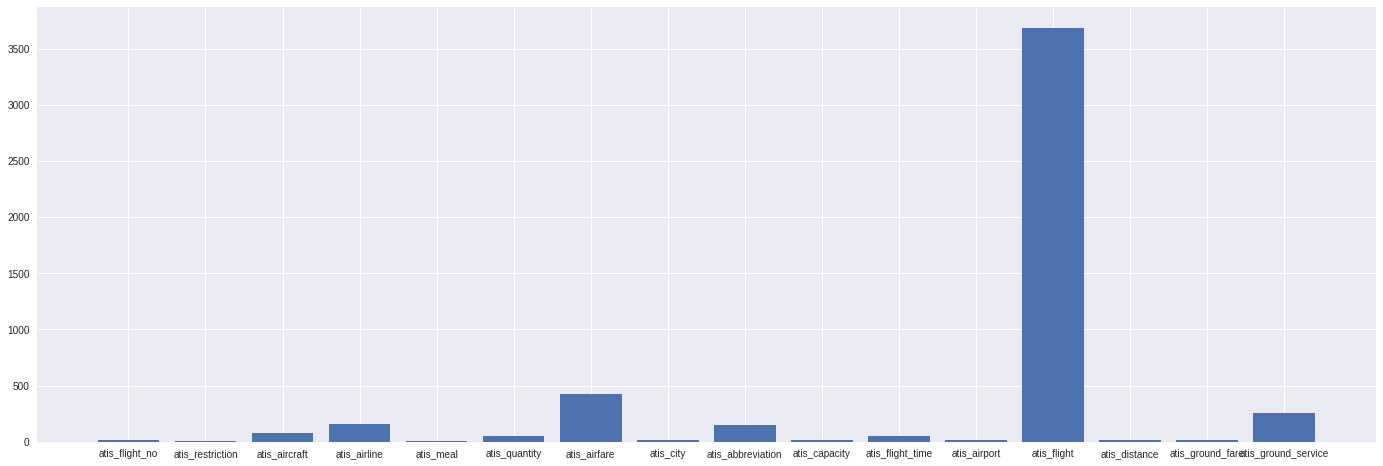

In [ ]:
plt.figure(figsize=(24, 8))
plt.bar(list(train_intents_freq.keys()),train_intents_freq.values())
plt.show()

In [ ]:
train_tags_freq = dict()
count = 0
for item in train_tags:
    for tag in item:
        if (tag in train_tags_freq): train_tags_freq[tag] += 1 #item.count(tag)
        else: train_tags_freq[tag] = 1 #item.count(tag)
        count += 1

for key in train_tags_freq:
    value = train_tags_freq[key]
    print('%s: %d (%.2f%%),' % (key, value, value / count * 100))

O: 35662 (63.46%),
B-fromloc.city_name: 4326 (7.70%),
B-toloc.city_name: 4343 (7.73%),
B-round_trip: 348 (0.62%),
I-round_trip: 339 (0.60%),
B-cost_relative: 343 (0.61%),
B-fare_amount: 53 (0.09%),
I-fare_amount: 51 (0.09%),
B-arrive_date.month_name: 47 (0.08%),
B-arrive_date.day_number: 47 (0.08%),
I-fromloc.city_name: 691 (1.23%),
B-stoploc.city_name: 239 (0.43%),
B-arrive_time.time_relative: 187 (0.33%),
B-arrive_time.time: 208 (0.37%),
I-arrive_time.time: 161 (0.29%),
B-toloc.state_code: 86 (0.15%),
I-toloc.city_name: 1099 (1.96%),
I-stoploc.city_name: 47 (0.08%),
B-meal_description: 57 (0.10%),
B-depart_date.month_name: 379 (0.67%),
B-depart_date.day_number: 395 (0.70%),
B-airline_name: 701 (1.25%),
I-airline_name: 421 (0.75%),
B-depart_time.period_of_day: 593 (1.06%),
B-depart_date.day_name: 889 (1.58%),
B-toloc.state_name: 77 (0.14%),
B-depart_time.time_relative: 323 (0.57%),
B-depart_time.time: 369 (0.66%),
B-toloc.airport_name: 39 (0.07%),
I-toloc.airport_name: 49 (0.09%),
B-d

In [ ]:
#importing test data

test_words = list()  # a list of list of words for every sentence in test dataset
test_tags = list() # a list of list of IOB tags for every sentence in test dataset
test_intents = list() # a list of intent for every sentence in test dataset
test_vocabs = set() # a list of dicts contaiting above data in a more structured form
test_data = list() # a set containing whole test dataset words

with open('atis.test.w-intent.iob') as f:
    for line in f.readlines():
        line = line.strip().split()
        
        index = 0
        words = list()
        for i, word in enumerate(line[:-1]):
            if (word == 'EOS'):
                index = i
                break
            if (word != 'BOS'): 
                word = re.sub(r'[^\w\s]', '', word.lower()) # removing punctuations & lowerizing word
                words.append(word) 
                train_vocabs.add(word)
        test_words.append(words)
        
        tags = list()
        for tag in line[index + 2:-1]:
            tags.append(tag)
        test_tags.append(tags)
                    
        #handling entries with multiple intents
        intent = ""
        if ('#' in line[-1]): 
            for item in line[-1].split('#'):
                intent = item
                break
        else: intent = line[-1]
        test_intents.append(intent)
        
        test_data.append({
            'words': words,
            'iob_tags': tags,
            #             'length': len(words),
            'intent': intent})

print('train dataset vocab size:', len(test_vocabs))
print('# of test dataset rows:', len(test_data))
print('# of test dataset unique intents:', len(set(test_intents)))
print('# of test dataset unique IOB tags:', len(set([tag for item in test_tags for tag in item])))

train dataset vocab size: 0
# of test dataset rows: 893
# of test dataset unique intents: 16
# of test dataset unique IOB tags: 101


In [ ]:
ind = 0
print('tokenized words:', test_data[ind]['words'])
print('IOB tags:', test_data[ind]['iob_tags'])
print('intent:', test_data[ind]['intent'])

tokenized words: ['i', 'would', 'like', 'to', 'find', 'a', 'flight', 'from', 'charlotte', 'to', 'las', 'vegas', 'that', 'makes', 'a', 'stop', 'in', 'st', 'louis']
IOB tags: ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-fromloc.city_name', 'O', 'B-toloc.city_name', 'I-toloc.city_name', 'O', 'O', 'O', 'O', 'O', 'B-stoploc.city_name', 'I-stoploc.city_name']
intent: atis_flight


In [ ]:
test_intents_freq = dict()
for intent in set(test_intents):
    test_intents_freq[intent] = test_intents.count(intent)
    
for key in test_intents_freq:
    value = test_intents_freq[key]
    print('%s: %d (%.2f%%) ,' % (key, value, value / len(test_intents) * 100))

atis_flight_no: 9 (1.01%) ,
atis_day_name: 2 (0.22%) ,
atis_airline: 38 (4.26%) ,
atis_meal: 6 (0.67%) ,
atis_city: 6 (0.67%) ,
atis_airfare: 49 (5.49%) ,
atis_quantity: 3 (0.34%) ,
atis_airport: 18 (2.02%) ,
atis_flight_time: 1 (0.11%) ,
atis_abbreviation: 33 (3.70%) ,
atis_aircraft: 9 (1.01%) ,
atis_flight: 645 (72.23%) ,
atis_capacity: 21 (2.35%) ,
atis_distance: 10 (1.12%) ,
atis_ground_fare: 7 (0.78%) ,
atis_ground_service: 36 (4.03%) ,


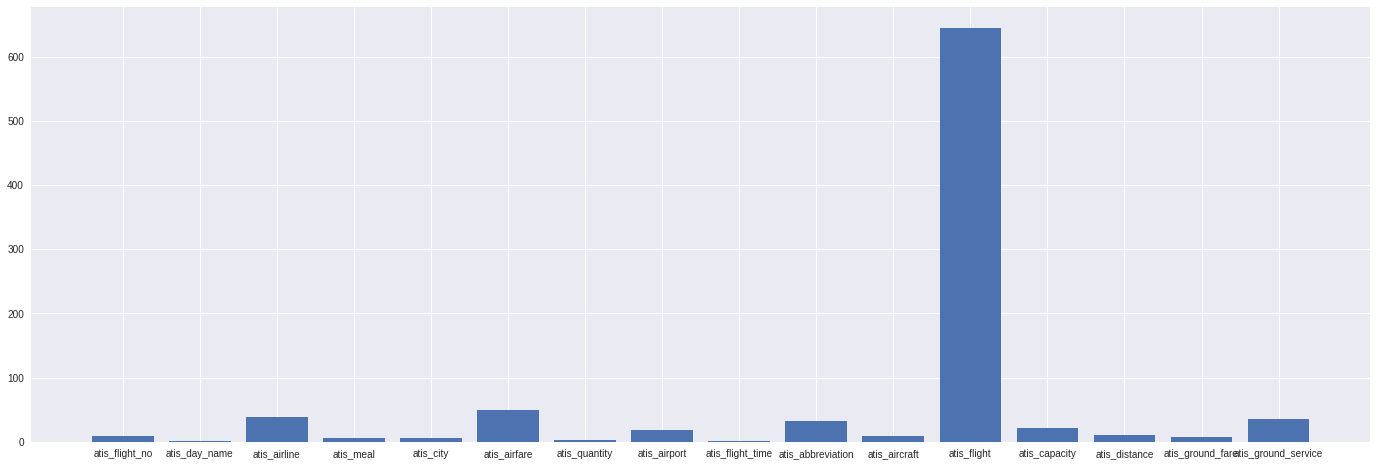

In [ ]:
plt.figure(figsize=(24, 8))
plt.bar(list(test_intents_freq.keys()),test_intents_freq.values())
plt.show()

In [ ]:
test_tags_freq = dict()
count = 0
for item in test_tags:
    for tag in item:
        if (tag in test_tags_freq): test_tags_freq[tag] += 1 #item.count(tag)
        else: test_tags_freq[tag] = 1 #item.count(tag)
        count += 1

for key in test_tags_freq:
    value = test_tags_freq[key]
    print('%s: %d (%.2f%%),' % (key, value, value / count * 100))

O: 5501 (60.03%),
B-fromloc.city_name: 704 (7.68%),
B-toloc.city_name: 716 (7.81%),
I-toloc.city_name: 265 (2.89%),
B-stoploc.city_name: 20 (0.22%),
I-stoploc.city_name: 10 (0.11%),
B-depart_date.month_name: 56 (0.61%),
B-depart_date.day_number: 55 (0.60%),
B-depart_time.time_relative: 65 (0.71%),
B-depart_time.time: 57 (0.62%),
I-depart_time.time: 52 (0.57%),
B-round_trip: 73 (0.80%),
I-round_trip: 71 (0.77%),
B-airline_name: 101 (1.10%),
I-airline_name: 65 (0.71%),
B-depart_date.day_name: 212 (2.31%),
B-depart_time.period_of_day: 130 (1.42%),
I-fromloc.city_name: 177 (1.93%),
B-meal_description: 10 (0.11%),
B-depart_date.date_relative: 17 (0.19%),
B-arrive_time.time_relative: 31 (0.34%),
B-arrive_time.time: 34 (0.37%),
I-arrive_time.time: 35 (0.38%),
B-return_date.day_name: 2 (0.02%),
B-arrive_date.date_relative: 2 (0.02%),
B-arrive_date.day_name: 11 (0.12%),
B-flight_stop: 21 (0.23%),
B-depart_date.today_relative: 9 (0.10%),
B-toloc.state_name: 28 (0.31%),
B-arrive_date.month_name: 

##### comparing train & test dataset tags & intents:

In [ ]:
print(test_vocabs.difference(train_vocabs))

set()


In [ ]:
set(test_intents).difference(set(train_intents))

{'atis_day_name'}

so from above, we see there is no train data for 'atis_day_name'...

In [ ]:
set(train_intents).difference(set(test_intents))

{'atis_restriction'}

and also there are no test data for 'atis_cheapest' & 'atis_restriction'...

In [ ]:
set(test_tags_freq.keys()).difference(set(train_tags_freq.keys()))

{'B-booking_class',
 'B-compartment',
 'B-flight',
 'B-stoploc.airport_code',
 'I-flight_number',
 'I-state_name'}

also we see there are no train data with 'B-stoploc.airport_code' or 'B-booking_class' or 'I-flight_number' or 'I-state_name' or 'B-flight' or 'B-compartment' tag...

In [ ]:
set(train_tags_freq.keys()).difference(set(test_tags_freq.keys()))

{'B-arrive_date.today_relative',
 'B-arrive_time.period_mod',
 'B-day_number',
 'B-month_name',
 'B-return_date.day_number',
 'B-return_date.month_name',
 'B-return_date.today_relative',
 'B-return_time.period_mod',
 'B-return_time.period_of_day',
 'B-stoploc.airport_name',
 'B-stoploc.state_code',
 'B-time',
 'B-time_relative',
 'B-today_relative',
 'I-arrive_date.day_number',
 'I-arrive_time.period_of_day',
 'I-depart_date.today_relative',
 'I-economy',
 'I-fare_basis_code',
 'I-flight_stop',
 'I-meal_code',
 'I-meal_description',
 'I-return_date.day_number',
 'I-return_date.today_relative',
 'I-time',
 'I-today_relative'}

and finally there are no train data with 'I-return_date.day_number' or 'B-return_time.period_mod' or ... tag.

to handle imbalanced data first we try to find and remove duplicates:

In [ ]:
#removing duplicate train data with 'atis_flight' intent

train_words_dup_free = list()
train_tags_dup_free = list()
train_intents_dup_free = list()
train_data_dup_free = list()
for i in range(len(train_words)):
    words = train_words[i]
    tags = train_tags[i]
    intent = train_intents[i]
    if (intent != 'atis_flight' or (intent == 'atis_flight' and words not in train_words_dup_free)):
        train_words_dup_free.append(words)
        train_tags_dup_free.append(tags)
        train_intents_dup_free.append(intent)
        train_data_dup_free.append({
            'words': words,
            'iob_tags': tags,
            #             'length': len(words),
            'intent': intent})

print('# of duplicate sentences in train data: %d - %d = %d' % (len(train_words), len(train_words_dup_free), len(train_words) - len(train_words_dup_free)))

# of duplicate sentences in train data: 4977 - 4733 = 244


In [ ]:
train_intents_dup_free_freq = dict()
for intent in train_intents_dup_free:
    train_intents_dup_free_freq[intent] = train_intents_dup_free.count(intent)

for key in train_intents_dup_free_freq:
    value = train_intents_dup_free_freq[key]
    print('%s: %d (%.2f%%),' % (key, value, value / len(train_intents_dup_free) * 100))

atis_flight: 3443 (72.74%),
atis_airfare: 424 (8.96%),
atis_airline: 159 (3.36%),
atis_ground_service: 256 (5.41%),
atis_quantity: 51 (1.08%),
atis_city: 19 (0.40%),
atis_abbreviation: 147 (3.11%),
atis_aircraft: 82 (1.73%),
atis_distance: 20 (0.42%),
atis_ground_fare: 18 (0.38%),
atis_capacity: 16 (0.34%),
atis_flight_time: 54 (1.14%),
atis_meal: 6 (0.13%),
atis_flight_no: 12 (0.25%),
atis_restriction: 6 (0.13%),
atis_airport: 20 (0.42%),


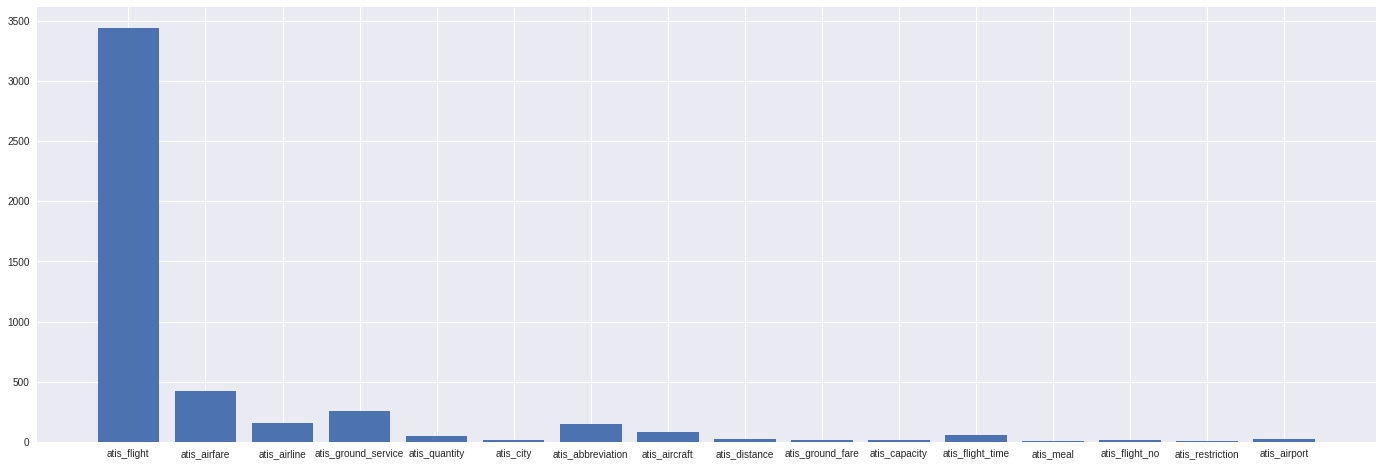

In [ ]:
plt.figure(figsize=(24, 8))
plt.bar(list(train_intents_dup_free_freq.keys()),train_intents_dup_free_freq.values())
plt.show()

In [ ]:
##removing duplicate test data with 'atis_flight' intent

test_words_dup_free = list()
test_tags_dup_free = list()
test_intents_dup_free = list()
test_data_dup_free = list()
for i in range(len(test_words)):
    words = test_words[i]
    tags = test_tags[i]
    intent = test_intents[i]
    if (intent != 'atis_flight' or (intent == 'atis_flight' and words not in test_words_dup_free)):
        test_words_dup_free.append(words)
        test_tags_dup_free.append(tags)
        test_intents_dup_free.append(intent)
        test_data.append({
            'words': words,
            'iob_tags': tags,
#             'length': len(words),
            'intent': intent})


print('# of duplicate sentences in test data: %d - %d = %d' % (len(test_words), len(test_words_dup_free),  len(test_words) - len(test_words_dup_free)))

# of duplicate sentences in test data: 893 - 874 = 19


In [ ]:
test_intents_dup_free_freq = dict()
for intent in set(test_intents_dup_free):
    test_intents_dup_free_freq[intent] = test_intents_dup_free.count(intent)

for key in test_intents_dup_free_freq:
    value = test_intents_dup_free_freq[key]
    print('%s: %d (%.2f%%),' % (key, value, value / len(test_intents_dup_free) * 100))

atis_flight_no: 9 (1.03%),
atis_day_name: 2 (0.23%),
atis_airline: 38 (4.35%),
atis_meal: 6 (0.69%),
atis_city: 6 (0.69%),
atis_airfare: 49 (5.61%),
atis_quantity: 3 (0.34%),
atis_airport: 18 (2.06%),
atis_flight_time: 1 (0.11%),
atis_abbreviation: 33 (3.78%),
atis_aircraft: 9 (1.03%),
atis_flight: 626 (71.62%),
atis_capacity: 21 (2.40%),
atis_distance: 10 (1.14%),
atis_ground_fare: 7 (0.80%),
atis_ground_service: 36 (4.12%),


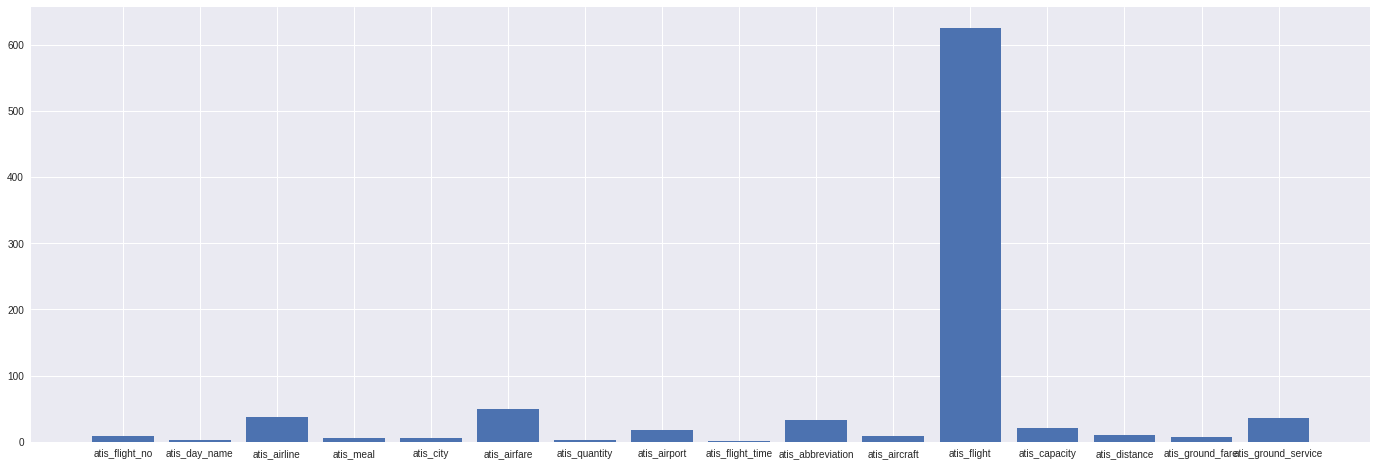

In [ ]:
plt.figure(figsize=(24, 8))
plt.bar(list(test_intents_dup_free_freq.keys()),test_intents_dup_free_freq.values())
plt.show()

so we can see that unfortunately removing duplicates didn't have any noticable improvment on balancing the dataset.

In [ ]:
from sklearn.utils import class_weight
# from keras.preprocessing.text import Tokenizer
# from keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelBinarizer
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np


def identity_tokenizer(text):
    return text
# define Tokenizer with Vocab Size
# tokenizer = Tokenizer(num_words=len(train_vocabs))
# tokenizer.fit_on_texts(train_words)
vectorizer = TfidfVectorizer(tokenizer=identity_tokenizer,lowercase=False)
x_train = vectorizer.fit_transform(train_words)
x_test = vectorizer.fit_transform(test_words)
# x_train = tokenizer.texts_to_matrix(train_words, mode='tfidf')
# x_test = tokenizer.texts_to_matrix(test_words, mode='tfidf')

encoder = LabelBinarizer()
encoder.fit(train_intents)
y_train = encoder.transform(train_intents)
y_test = encoder.transform(test_intents)
print(encoder.classes_)
print(x_train.shape, y_train.shape)
#class_weight.compute_class_weight('balanced',np.unique(train_intents) ,train_intents)

['atis_abbreviation' 'atis_aircraft' 'atis_airfare' 'atis_airline'
 'atis_airport' 'atis_capacity' 'atis_city' 'atis_distance' 'atis_flight'
 'atis_flight_no' 'atis_flight_time' 'atis_ground_fare'
 'atis_ground_service' 'atis_meal' 'atis_quantity' 'atis_restriction']
(4977, 898) (4977, 16)


In [ ]:
desired_count = 500
strategy = {0: desired_count, 15: desired_count}# setting atis_restriction and atis_abbreviation classes count just as an example

In [ ]:
from imblearn.over_sampling import SMOTE, ADASYN
smote = ADASYN(sampling_strategy=strategy, n_neighbors=5) #SMOTE(sampling_strategy='minority', k_neighbors=5)
X_sm, y_sm = smote.fit_resample(x_train, y_train)
print(X_sm.shape, y_sm.shape)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


(5811, 898) (5811, 16)


In [ ]:
y_temp = list(encoder.inverse_transform(y_sm))
temp_freq = dict()
for intent in y_temp:
    temp_freq[intent] = y_temp.count(intent)

for key in temp_freq:
    value = temp_freq[key]
    print('%s: %d (%.2f%%),' % (key, value, value / len(y_temp) * 100))

atis_flight: 3687 (63.45%),
atis_airfare: 424 (7.30%),
atis_airline: 159 (2.74%),
atis_ground_service: 256 (4.41%),
atis_quantity: 51 (0.88%),
atis_city: 19 (0.33%),
atis_abbreviation: 488 (8.40%),
atis_aircraft: 82 (1.41%),
atis_distance: 20 (0.34%),
atis_ground_fare: 18 (0.31%),
atis_capacity: 16 (0.28%),
atis_flight_time: 54 (0.93%),
atis_meal: 6 (0.10%),
atis_flight_no: 12 (0.21%),
atis_restriction: 499 (8.59%),
atis_airport: 20 (0.34%),


#TO-DO: code cleaning

> Indented block



# Synonym replacement

In [ ]:
%%capture
!pip install numpy requests nlpaug transformers

In [ ]:
# %%capture
import nlpaug.augmenter.word as naw
import nlpaug.model.word_stats as nmw
from nlpaug.util.file.download import DownloadUtil
import nltk
import gensim.downloader as api

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('universal_tagset')
nltk.download('stopwords')
nltk.download('wordnet')
stop = nltk.corpus.stopwords.words('english')

# glove = api.load('glove-twitter-25') 
DownloadUtil.download_glove(model_name='glove.6B', dest_dir='.') # Download GloVe model

# Train TF-IDF model
# tfidf_model = nmw.TfIdf()
# tfidf_model.train(train_words)
# tfidf_model.save('.')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
aug_p=0.25
aug_max=3
aug_min=1
syn = naw.SynonymAug(aug_src='wordnet', stopwords=stop, aug_p=aug_p, aug_max=aug_max, aug_min=aug_min)
context = naw.ContextualWordEmbsAug(model_path='bert-base-uncased', stopwords=stop, aug_p=aug_p, aug_max=aug_max, aug_min=aug_min,action="substitute")
emb = naw.WordEmbsAug(model_type='glove', model_path='glove.6B.300d.txt', stopwords=stop, aug_p=aug_p, aug_max=aug_max, aug_min=aug_min,action="substitute")
# tfidf = naw.TfIdfAug(model_path='.',stopwords=stop, aug_p=aug_p, aug_max=aug_max, aug_min=aug_min,action="substitute")

In [116]:
import pickle
f = open('train_data_augmented.pkl','wb')
train_data_augmented = list()
starting_index = 0
i = starting_index
while (i < len(train_data_dup_free)):
# for i in range(starting_index, len(train_data_dup_free)):
  if (train_data_dup_free[i]['intent'] != 'atis_flight'):
    orig_sentence = " ".join(train_data_dup_free[i]['words'])
    orig_tags = train_data_dup_free[i]['iob_tags']
    orig_intent = train_data_dup_free[i]['intent']
    print('\nindex = %d, intent: %s\noriginal sentence: %s\n' % (i, orig_intent, orig_sentence))

    generated = list()
    generated += context.augment(orig_sentence, n = 4)
    generated += emb.augment(orig_sentence, n = 3)
    generated += syn.augment(orig_sentence, n = 3)
    for j in range(len(generated)):
      if (j == 4 or j == 7): print()
      print('#%d: %s' % (j, generated[j]))
    new_sentence = ''
    while(True):
      inp = input('\nenter value between 0-9 or n to manually enter new sentence, r to regenerate sentences or b to break : ')
      if (inp.isalpha()):
        if (inp.lower() == 'n'): new_sentence = input('enter new sentence: ')
        elif (inp.lower() == 'r'):
          generated = list()
          generated += context.augment(orig_sentence, n = 4)
          generated += emb.augment(orig_sentence, n = 3)
          generated += syn.augment(orig_sentence, n = 3)
          print('\nindex=%d, intent:%s\noriginal sentence: %s\n' % (i, orig_intent, orig_sentence))
          for j in range(len(generated)):
            if (j == 4 or j == 7): print()
            print('#%d: %s' % (j, generated[j]))
          continue

        elif (inp.lower() == 'b'):
          print('_' * 80)
          print('\nlast index = %d\nbreaking...' % (i))
          i = len(train_data_dup_free)
          pickle.dump(train_data_augmented, f)
          break

        else: continue

      elif (inp.isnumeric()):
        inp = int(inp)
        if(inp > 9): continue
        new_sentence = generated[inp]

      else: continue

      ans = input('\noriginal sentence: %s\nnew sentence: %s\nis it ok? (y or n) ' %(orig_sentence, new_sentence))
      if (ans.lower() == 'y' or ans.lower() == 'yes'): break
    
    if (new_sentence != ''):
      new_words = new_sentence.strip().split()
      train_data_augmented.append({
              'words': new_words,
              'iob_tags': orig_tags,
  #             'length': len(new_words),
              'intent': orig_intent})     
    
    pickle.dump(train_data_augmented, f)
    print('_' * 80)
  i += 1

f.close()


index = 1, intent: atis_airfare
original sentence: round trip fares from baltimore to philadelphia less than 1000 dollars round trip fares from denver to philadelphia less than 1000 dollars round trip fares from pittsburgh to philadelphia less than 1000 dollars

#0: peak trip fares from baltimore to philadelphia less than 1000 dollars round trip fares from denver to philadelphia less than 850 notes round trip fares from pittsburgh to philadelphia less than 1000 dollars
#1: round trip fares from portland to philadelphia less than 1000 dollars round service fares from denver to philadelphia less than 1000 dollars round trip fares from pittsburgh to philadelphia less than 1000 dollars
#2: round trip fares from baltimore to philadelphia less than 1000 dollars round bus fares from denver to philadelphia less than 1000 dollars same trip travel from pittsburgh to philadelphia less than 1000 dollars
#3: round trip fares from baltimore to erie less than 1000 dollars round shuttle fares from de

In [117]:
f = open('train_data_augmented.pkl','rb')
new_dict = pickle.load(f)
f.close()
len(new_dict)

1

In [ ]:
# %%capture
# !pip install textaugment

In [ ]:
# import gensim.downloader as api

# # Download the models
# # fasttext_model300 = api.load('fasttext-wiki-news-subwords-300')
# conceptnet =  api.load('conceptnet-numberbatch-17-06-300')
# # word2vec_model300 = api.load('word2vec-google-news-300') # crash!
# # glove_model300 = api.load('glove-wiki-gigaword-300')

# # Get word embeddings
# # word2vec_model300.most_similar('support')

[==================================================] 100.0% 1168.7/1168.7MB downloaded


In [ ]:
# from textaugment import Word2vec
# t = Word2vec(model=conceptnet)
# t.augment('i want to fly from baltimore to dallas round trip')

#Similar sentences

In [ ]:
train_sentences_dup_free = list()
for i in range(len(train_intents_dup_free)):
  if (train_intents_dup_free[i] == 'atis_flight'): 
    item = " ".join(train_words_dup_free[i]) #stop words?
    train_sentences_dup_free.append(item)

len(train_sentences_dup_free)

3443

In [ ]:
%%capture
!pip install -U sentence-transformers

In [ ]:
%%capture
from sentence_transformers import SentenceTransformer, util
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy
import numpy as np
import time  

corpus_sentences = train_sentences_dup_free
embedder = SentenceTransformer('paraphrase-mpnet-base-v2')

Downloading:   0%|          | 0.00/690 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.70k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/594 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.19k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
# finding similar pairs

#Compute embeddings
corpus_embeddings = embedder.encode(corpus_sentences,show_progress_bar=True, convert_to_tensor=True)

#Compute cosine-similarities for each sentence with each other sentence
cosine_scores = util.pytorch_cos_sim(corpus_embeddings, corpus_embeddings)

#Find the pairs with the highest cosine similarity scores
pairs = []
for i in range(len(cosine_scores)-1):
    for j in range(i+1, len(cosine_scores)):
        pairs.append({'index': [i, j], 'score': cosine_scores[i][j]})

#Sort scores in decreasing order
pairs = sorted(pairs, key=lambda x: x['score'], reverse=True)

for pair in pairs[0:10]:
    i, j = pair['index']
    print("{} \t\t {} \t\t Score: {:.4f}".format(corpus_sentences[i], corpus_sentences[j], pair['score']))

Batches:   0%|          | 0/108 [00:00<?, ?it/s]

In [ ]:
f = open('similar-pairs.txt', 'w')
for pair in pairs:
  i, j = pair['index']
  f.write("{} \t\t {} \t\t Score: {:.4f}\n".format(corpus_sentences[i], corpus_sentences[j], pair['score']))
  #print("{} \t\t {} \t\t Score: {:.4f}".format(sentences[i], sentences[j], pair['score']))
  if (pair['score'] < 0.8): break
f.close()

In [ ]:
# Corpus with example sentences
corpus_sentences = train_sentences_dup_free
corpus_embeddings = embedder.encode(corpus_sentences,show_progress_bar=True)

# Normalize the embeddings to unit length
corpus_embeddings = corpus_embeddings /  np.linalg.norm(corpus_embeddings, axis=1, keepdims=True)

In [ ]:
# K-means

num_clusters = 2000
clustering_model = KMeans(n_clusters=num_clusters)
clustering_model.fit(corpus_embeddings)
cluster_assignment = clustering_model.labels_

clustered_sentences = [[] for i in range(num_clusters)]
for sentence_id, cluster_id in enumerate(cluster_assignment):
    clustered_sentences[cluster_id].append(corpus_sentences[sentence_id])

In [ ]:
reduced_data = PCA(n_components=2).fit_transform(corpus_embeddings)
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .01     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(24, 12))
plt.clf()
plt.imshow(Z, interpolation="nearest",
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired, aspect="auto", origin="lower")

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=5)
# Plot the centroids as a white X
# centroids = kmeans.cluster_centers_
# plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=169, linewidths=3,
#             color="w", zorder=10)
plt.title("K-means clustering (PCA-reduced data)")
          # "Centroids are marked with white cross")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [ ]:
# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions

fig = plt.figure(1, figsize=(16, 12))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(corpus_embeddings)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2],c=kmeans.labels_,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions - Kmeans")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

In [ ]:
pca = PCA(n_components=2)
X_r = pca.fit(corpus_embeddings).transform(corpus_embeddings)


# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

plt.figure(1, figsize=(16, 12))

for i, target_name in zip([x for x in range(len(kmeans.labels_))], set(kmeans.labels_)):
    plt.scatter(X_r[kmeans.labels_ == i, 0], X_r[ kmeans.labels_ == i, 1], alpha=.8, label=target_name)
# plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA K-means')

plt.show()

In [ ]:
f = open('Clusters-k-means.txt', 'w')
for i, cluster in enumerate(clustered_sentences):
    f.write("Cluster %d, #%d Elements :\n" % (i+1, len(cluster)) + str(cluster) + "\n\n\n")
    # print("Cluster ", i+1)
    # print(cluster)
    # print("")
f.close()

In [ ]:
# Agglomerative Clustering

clustering_model = AgglomerativeClustering(n_clusters=None, distance_threshold=1) 
# clustering_model = AgglomerativeClustering(n_clusters=None, affinity='cosine', linkage='average', distance_threshold=0.1)
model = clustering_model.fit(corpus_embeddings)
cluster_assignment = clustering_model.labels_

clustered_sentences = {}
for sentence_id, cluster_id in enumerate(cluster_assignment):
    if cluster_id not in clustered_sentences: clustered_sentences[cluster_id] = list()
    clustered_sentences[cluster_id].append(corpus_sentences[sentence_id])

len(clustered_sentences)

In [ ]:
pca = PCA(n_components=2)
X_r = pca.fit(corpus_embeddings).transform(corpus_embeddings)


# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

plt.figure(1, figsize=(16, 12))

for i, target_name in zip([x for x in range(len(clustering_model.labels_))], set(clustering_model.labels_)):
    plt.scatter(X_r[clustering_model.labels_ == i, 0], X_r[ clustering_model.labels_ == i, 1], alpha=.8, label=target_name)
# plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA Agglomerative Clustering')

plt.show()

In [ ]:
# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions

fig = plt.figure(1, figsize=(16, 12))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(corpus_embeddings)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2],c=clustering_model.labels_,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions - Agglomerative Clustering")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

In [ ]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
  
plt.figure(figsize=(24, 10))
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model)#, truncate_mode='level', p=7)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [ ]:
f = open('Clusters-Agglomerative.txt', 'w')
for i, cluster in clustered_sentences.items():
    if (len(cluster) > 1): f.write("Cluster %d, #%d Elements :\n" % (i+1, len(cluster)) + str(cluster) + "\n\n\n")
    # print("Cluster ", i+1)
    # print(cluster)
    # print("")
f.close()

In [ ]:
# import sys
# sys.setrecursionlimit(15000)

In [ ]:
Z = hierarchy.linkage(corpus_embeddings, 'ward')
plt.figure(figsize=(24, 8))
plt.title('Dendrogram')
dn = hierarchy.dendrogram(Z)
plt.show()

In [ ]:
# Fast Clustering

corpus_sentences = train_sentences_dup_free
print("Encode the corpus. This might take a while")
corpus_embeddings = embedder.encode(corpus_sentences, batch_size=64, show_progress_bar=True, convert_to_tensor=True)

In [ ]:
print("Start clustering")
start_time = time.time()

#Two parameters to tune:
#min_cluster_size: Only consider cluster that have at least 1 elements
#threshold: Consider sentence pairs with a cosine-similarity larger than threshold as similar
clusters = util.community_detection(corpus_embeddings, min_community_size=1, threshold=0.95)

print("Clustering done after {:.2f} sec".format(time.time() - start_time))

In [ ]:
f = open('Clusters.txt', 'w')
#Print for all clusters the top 3 and bottom 3 elements
for i, cluster in enumerate(clusters):
    #print("\nCluster {}, #{} Elements ".format(i+1, len(cluster)))
    data = [corpus_sentences[sentence_id] for sentence_id in cluster]
    f.write("Cluster {}, #{} Elements \n".format(i+1, len(cluster)) + str(data) + "\n\n\n")

    # for sentence_id in cluster[0:3]:
    #     #print("\t", corpus_sentences[sentence_id])
    #     f.write("\t" + corpus_sentences[sentence_id])
    # #print("\t", "...")
    # f.write("\t ...")
    # for sentence_id in cluster[-3:]:
    #     #print("\t", corpus_sentences[sentence_id])
    #     f.write("\t" + corpus_sentences[sentence_id])
    
f.close()